Initialize:
- K: number of clusters
- Data: the input dataset X
- Randomly select K initial centroids

Repeat:
- Assign each data point to the nearest centroid (based on Euclidean distance)
- Calculate the mean of each cluster to update its centroid
- Check if the centroids have converged (i.e., they no longer change)

Until:
- The centroids have converged
- The maximum number of iterations has been reached

Output:
- The final K clusters and their corresponding centroids

In [1]:
import numpy as np
class KMeans:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        n_samples, n_features = X.shape
        # Randomly initialize the centroid
        self.centroids = X[np.random.choice(n_samples, self.k, replace=False)]
        for _ in range(self.max_iters):
            # Assign clusters based on closest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            # Calculate new centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
            
            # Check for convergence
            if np.all(new_centroids == self.centroids):
                break
            
            self.centroids = new_centroids

        return labels
    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    

In [4]:
x1 = np.random.randn(5,2) + 5
x2 = np.random.randn(5,2) - 5
X = np.concatenate([x1,x2], axis=0)

# Initialize the KMeans object with k=3
kmeans = KMeans(k=2)

# Fit the k-means model to the dataset
kmeans.fit(X)

# Get the cluster assignments for the input dataset
cluster_assignments = kmeans.predict(X)

# Print the cluster assignments
print(cluster_assignments)

# Print the learned centroids
print(kmeans.centroids)

[1 1 1 1 1 0 0 0 0 0]
[[-5.21784955 -5.30934158]
 [ 5.46007813  5.10537184]]


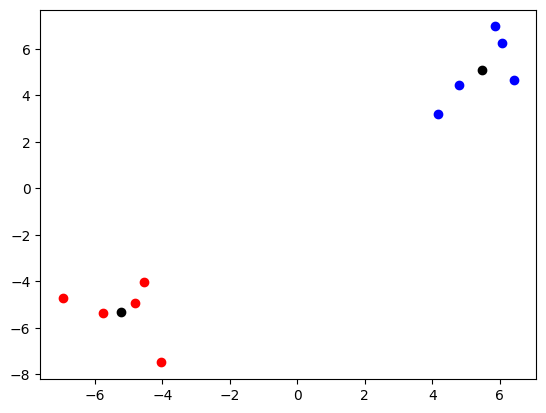

In [5]:
from matplotlib import pyplot as plt
# Plot the data points with different colors based on their cluster assignments
colors = ['r', 'b']
for i in range(kmeans.k):
    plt.scatter(X[np.where(np.array(cluster_assignments) == i)][:,0], 
                X[np.where(np.array(cluster_assignments) == i)][:,1], 
                color=colors[i])

# Plot the centroids as black circles
plt.scatter(kmeans.centroids[:,0], kmeans.centroids[:,1], color='black', marker='o')

# Show the plot
plt.show()